In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os 

os.environ['KERAS_BACKEND'] = 'tensorflow'

import tensorflow as tf
config = tf.ConfigProto(
        device_count = {'GPU': 0}
    )
sess = tf.Session(config=config)

from keras import backend as K
from keras.layers import Input, Lambda

K.tensorflow_backend.set_session(session=sess)

Using TensorFlow backend.


In [3]:
K.backend(), K.image_data_format()

('tensorflow', 'channels_last')

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt
import cv2

%matplotlib inline

In [5]:
def open_img_as_x(filename, image_size=(224, 224)):
    img = Image.open(filename)
    img = np.asarray(img)
    x = cv2.resize(img, dsize=image_size)
    x = x[None, :, :, :3].astype(np.float32)
    return x

In [6]:
x = open_img_as_x('dog.jpg')

In [7]:
import os
import sys
# Project
project_common_path = os.path.dirname('.')
project_common_path = os.path.abspath(os.path.join(project_common_path, '..', 'common'))
if not project_common_path in sys.path:
    sys.path.append(project_common_path)
    

In [8]:
from visu_utils import compute_layer_outputs

## VGG16

In [9]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

In [10]:
input_shape = (224, 224, 3)
input_tensor = Input(input_shape)
vgg16 = VGG16(input_tensor=input_tensor)

y_pred = vgg16.predict_on_batch(preprocess_input(x.copy()))

decode_predictions(y_pred)

[[('n02113023', 'Pembroke', 0.85729671),
  ('n02113186', 'Cardigan', 0.13754617),
  ('n02085620', 'Chihuahua', 0.0037144583),
  ('n02109961', 'Eskimo_dog', 0.00051111786),
  ('n02115641', 'dingo', 0.00027458984)]]

In [11]:
print([l.name for l in vgg16.layers])

['input_1', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool', 'flatten', 'fc1', 'fc2', 'predictions']


In [12]:
layer_output_f_dict = {}

In [13]:
layer_names=['block1_pool', 'block2_pool', 'block3_pool', 'block4_pool', 'block5_pool']
layer_outputs = compute_layer_outputs(preprocess_input(x.copy()), vgg16, layer_output_f_dict, layer_names=layer_names)

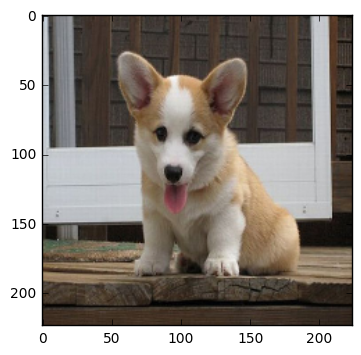

In [14]:
plt.figure(figsize=(12,4))
plt.imshow(x[0, :, :, :].astype(np.uint8))

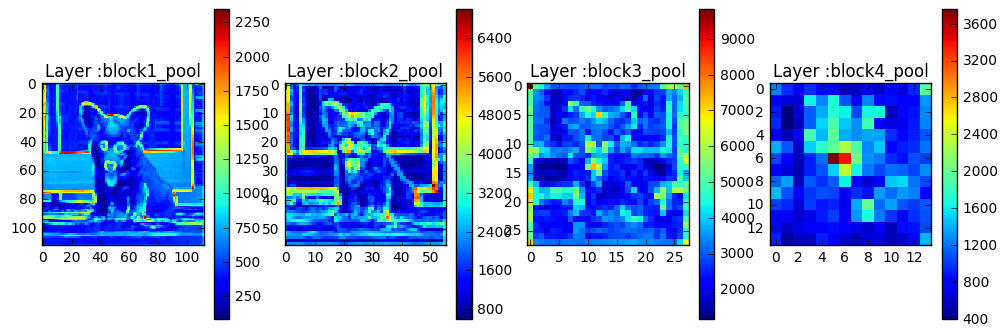

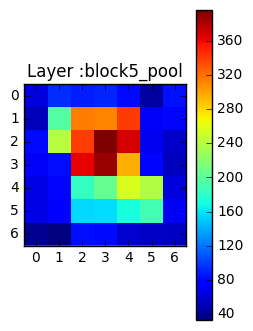

In [15]:
n = 4
for i, name in enumerate(layer_names):
    img = layer_outputs[name]
    img = np.max(img[0, :, :, :], axis=2)
    if i % n == 0:
        plt.figure(figsize=(12,4))
    plt.subplot(1, n, i % n + 1)
    plt.imshow(img, interpolation='none')
    plt.colorbar()
    plt.title('Layer :' + name)

In [18]:
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [19]:
vgg16.get_layer(name='block3_pool').output._keras_shape

(None, 28, 28, 256)

## VGG19

In [16]:
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [17]:
input_shape = (224, 224, 3)
input_tensor = Input(input_shape)
vgg19 = VGG19(input_tensor=input_tensor)

y_pred = vgg19.predict_on_batch(preprocess_input(x.copy()))

decode_predictions(y_pred)

[[('n02113023', 'Pembroke', 0.87108982),
  ('n02113186', 'Cardigan', 0.12721455),
  ('n02085620', 'Chihuahua', 0.00057869166),
  ('n02115641', 'dingo', 0.00031618463),
  ('n02109961', 'Eskimo_dog', 0.00014770188)]]

In [18]:
print([l.name for l in vgg19.layers])

['input_2', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_conv4', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_conv4', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_conv4', 'block5_pool', 'flatten', 'fc1', 'fc2', 'predictions']


In [19]:
layer_output_f_dict = {}

In [20]:
layer_names=['block1_pool', 'block2_pool', 'block3_pool', 'block4_pool', 'block5_pool']
layer_outputs = compute_layer_outputs(preprocess_input(x.copy()), vgg19, layer_output_f_dict, layer_names=layer_names)

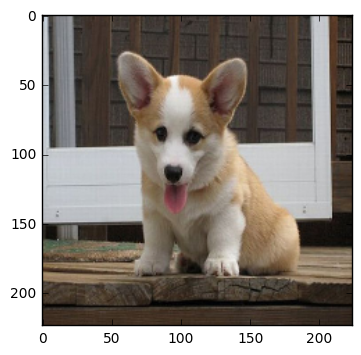

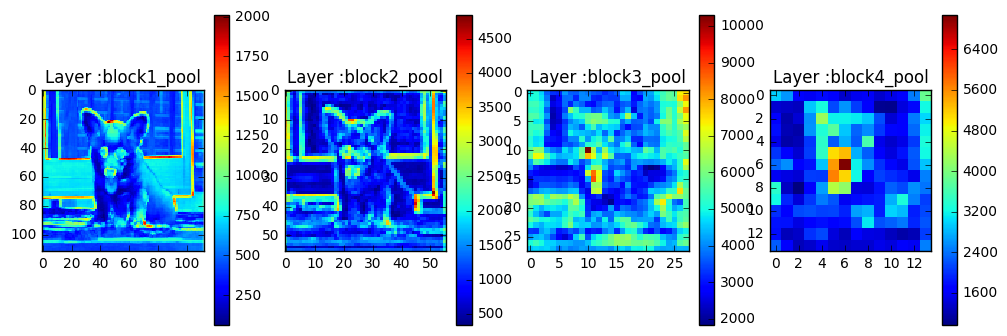

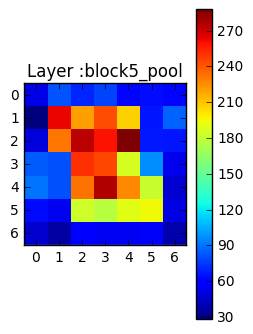

In [22]:
plt.figure(figsize=(12,4))
plt.imshow(x[0, :, :, :].astype(np.uint8))
n = 4
for i, name in enumerate(layer_names):
    img = layer_outputs[name]
    img = np.max(img[0, :, :, :], axis=2)
    if i % n == 0:
        plt.figure(figsize=(12,4))
    plt.subplot(1, n, i % n + 1)
    plt.imshow(img, interpolation='none')
    plt.colorbar()
    plt.title('Layer :' + name)

In [27]:
vgg19.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [28]:
vgg19.get_layer(name='block3_pool').output._keras_shape

(None, 28, 28, 256)

## ResNet50

In [23]:
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

In [24]:
input_shape = (224, 224, 3)
input_tensor = Input(input_shape)
resnet = ResNet50(input_tensor=input_tensor)

y_pred = resnet.predict_on_batch(preprocess_input(x.copy()))

decode_predictions(y_pred)

[[('n02113023', 'Pembroke', 0.92744374),
  ('n02113186', 'Cardigan', 0.07117182),
  ('n02085620', 'Chihuahua', 0.00051022542),
  ('n02109961', 'Eskimo_dog', 0.00020248115),
  ('n02110185', 'Siberian_husky', 0.00018460627)]]

In [25]:
print([l.name for l in resnet.layers])

['input_3', 'zero_padding2d_1', 'conv1', 'bn_conv1', 'activation_1', 'max_pooling2d_1', 'res2a_branch2a', 'bn2a_branch2a', 'activation_2', 'res2a_branch2b', 'bn2a_branch2b', 'activation_3', 'res2a_branch2c', 'res2a_branch1', 'bn2a_branch2c', 'bn2a_branch1', 'add_1', 'activation_4', 'res2b_branch2a', 'bn2b_branch2a', 'activation_5', 'res2b_branch2b', 'bn2b_branch2b', 'activation_6', 'res2b_branch2c', 'bn2b_branch2c', 'add_2', 'activation_7', 'res2c_branch2a', 'bn2c_branch2a', 'activation_8', 'res2c_branch2b', 'bn2c_branch2b', 'activation_9', 'res2c_branch2c', 'bn2c_branch2c', 'add_3', 'activation_10', 'res3a_branch2a', 'bn3a_branch2a', 'activation_11', 'res3a_branch2b', 'bn3a_branch2b', 'activation_12', 'res3a_branch2c', 'res3a_branch1', 'bn3a_branch2c', 'bn3a_branch1', 'add_4', 'activation_13', 'res3b_branch2a', 'bn3b_branch2a', 'activation_14', 'res3b_branch2b', 'bn3b_branch2b', 'activation_15', 'res3b_branch2c', 'bn3b_branch2c', 'add_5', 'activation_16', 'res3c_branch2a', 'bn3c_branc

In [50]:
bn_name_base = 'bn' + str(5) + 'c' + '_branch' + '2c'
def _get_resnet_activation_name(resnet, bn_name_2c):
    t = []
    for l in resnet.layers:
        if l.name == bn_name_2c:
            t.append(l.name)
            continue
        if len(t) > 0:
            t.append(l.name)
        if len(t) == 3:
            break
    return t[-1]

In [32]:
resnet.get_layer(index=37).name

'activation_10'

In [26]:
resnet.get_layer(index=79).name

'activation_22'

In [53]:
_get_resnet_activation_name(resnet, 'bn' + str(3) + 'd' + '_branch' + '2c')

'activation_357'

In [38]:
layer_output_f_dict = {}

In [39]:
layer_names=['max_pooling2d_1', 'activation_10', 'activation_22', 'activation_40', 'activation_49']
layer_outputs = compute_layer_outputs(x, resnet, layer_output_f_dict, layer_names=layer_names)

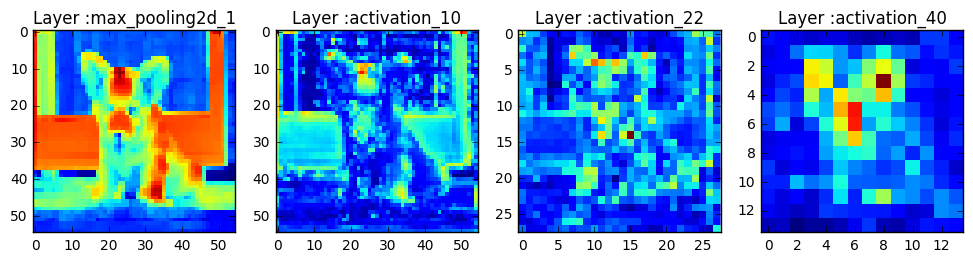

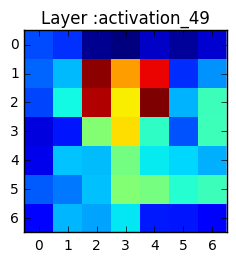

In [40]:
n = 4
for i, name in enumerate(layer_names):
    img = layer_outputs[name]
    img = np.max(img[0, :, :, :], axis=2)
    if i % n == 0:
        plt.figure(figsize=(12,4))
    plt.subplot(1, n, i % n + 1)
    plt.imshow(img, interpolation='none')
    plt.title('Layer :' + name)

In [45]:
resnet.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D) (None, 230, 230, 3)   0           input_3[0][0]                    
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472        zero_padding2d_1[0][0]           
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
___________________________________________________________________________________________

In [46]:
resnet.get_layer(name='activation_22').output._keras_shape

(None, 28, 28, 512)

## InceptionV3

In [63]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input

from keras.layers import ZeroPadding2D

In [95]:
input_shape = (224, 224, 3)
input_tensor = Input(input_shape)
input_tensor = ZeroPadding2D(padding=(13, 13))(input_tensor)
incv3 = InceptionV3(input_tensor=input_tensor)

y_pred = incv3.predict_on_batch(preprocess_input(x.copy()))

decode_predictions(y_pred)

[[('n02113023', 'Pembroke', 0.90862709),
  ('n02113186', 'Cardigan', 0.089832351),
  ('n02106662', 'German_shepherd', 6.7672212e-05),
  ('n02797295', 'barrow', 5.3587475e-05),
  ('n02088364', 'beagle', 4.2945514e-05)]]

In [96]:
incv3.get_layer(name='mixed0').output._keras_shape

(None, 28, 28, 256)

In [97]:
print([l.name for l in incv3.layers])

['input_13', 'zero_padding2d_10', 'conv2d_847', 'batch_normalization_847', 'activation_896', 'conv2d_848', 'batch_normalization_848', 'activation_897', 'conv2d_849', 'batch_normalization_849', 'activation_898', 'max_pooling2d_38', 'conv2d_850', 'batch_normalization_850', 'activation_899', 'conv2d_851', 'batch_normalization_851', 'activation_900', 'max_pooling2d_39', 'conv2d_855', 'batch_normalization_855', 'activation_904', 'conv2d_853', 'conv2d_856', 'batch_normalization_853', 'batch_normalization_856', 'activation_902', 'activation_905', 'average_pooling2d_82', 'conv2d_852', 'conv2d_854', 'conv2d_857', 'conv2d_858', 'batch_normalization_852', 'batch_normalization_854', 'batch_normalization_857', 'batch_normalization_858', 'activation_901', 'activation_903', 'activation_906', 'activation_907', 'mixed0', 'conv2d_862', 'batch_normalization_862', 'activation_911', 'conv2d_860', 'conv2d_863', 'batch_normalization_860', 'batch_normalization_863', 'activation_909', 'activation_912', 'averag

In [98]:
layer_output_f_dict = {}

In [99]:
layer_names=[incv3.get_layer(index=10).name, 
             incv3.get_layer(index=17).name, 
             'mixed0', 'mixed1', 'mixed2', 
             'mixed3', 'mixed4', 'mixed5', 
             'mixed6', 'mixed7', 'mixed8', 
             'mixed9', 'mixed10', ]
layer_outputs = compute_layer_outputs(x, incv3, layer_output_f_dict, layer_names=layer_names)

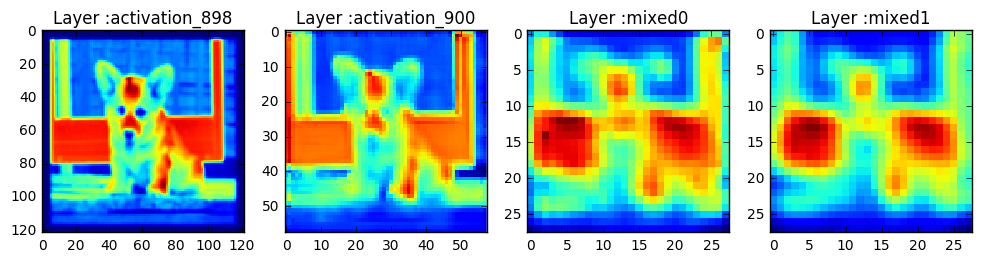

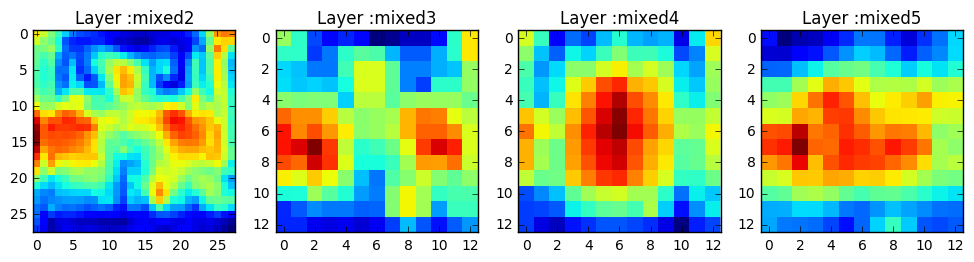

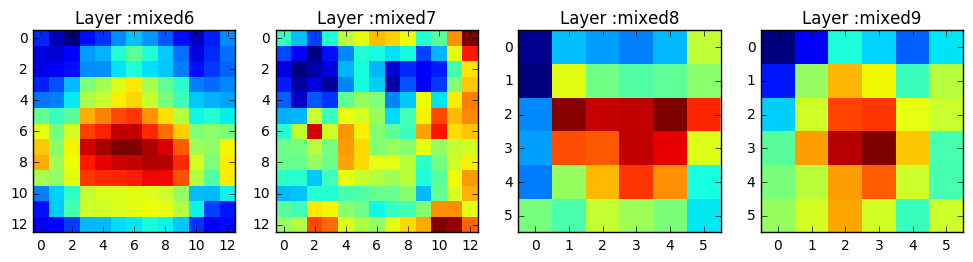

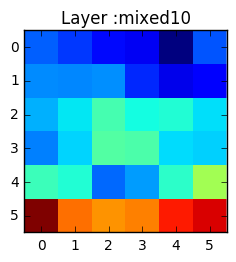

In [100]:
n = 4
for i, name in enumerate(layer_names):
    img = layer_outputs[name]
    img = np.max(img[0, :, :, :], axis=2)
    if i % n == 0:
        plt.figure(figsize=(12,4))
    plt.subplot(1, n, i % n + 1)
    plt.imshow(img, interpolation='none')
    plt.title('Layer :' + name)

In [101]:
incv3.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_13 (InputLayer)            (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_10 (ZeroPadding2D (None, 250, 250, 3)   0           input_13[0][0]                   
____________________________________________________________________________________________________
conv2d_847 (Conv2D)              (None, 124, 124, 32)  864         zero_padding2d_10[0][0]          
____________________________________________________________________________________________________
batch_normalization_847 (BatchNo (None, 124, 124, 32)  96          conv2d_847[0][0]                 
___________________________________________________________________________________________

In [102]:
incv3.get_layer(index=17).output._keras_shape

(None, 58, 58, 192)

In [103]:
incv3.get_layer(name='mixed0').output._keras_shape

(None, 28, 28, 256)

## Xception

In [33]:
from keras.applications.xception import Xception, preprocess_input, decode_predictions

In [34]:
input_shape = (224, 224, 3)
input_tensor = Input(input_shape)
xcnn = Xception(input_tensor=input_tensor)

y_pred = xcnn.predict_on_batch(preprocess_input(x.copy()))

decode_predictions(y_pred)

[[('n02113023', 'Pembroke', 0.98857832),
  ('n02113186', 'Cardigan', 0.011414397),
  ('n02086910', 'papillon', 2.505167e-06),
  ('n02085620', 'Chihuahua', 1.7941223e-06),
  ('n03133878', 'Crock_Pot', 2.7708509e-07)]]

In [35]:
print([l.name for l in xcnn.layers])

['input_4', 'block1_conv1', 'block1_conv1_bn', 'block1_conv1_act', 'block1_conv2', 'block1_conv2_bn', 'block1_conv2_act', 'block2_sepconv1', 'block2_sepconv1_bn', 'block2_sepconv2_act', 'block2_sepconv2', 'block2_sepconv2_bn', 'conv2d_1', 'block2_pool', 'batch_normalization_1', 'add_17', 'block3_sepconv1_act', 'block3_sepconv1', 'block3_sepconv1_bn', 'block3_sepconv2_act', 'block3_sepconv2', 'block3_sepconv2_bn', 'conv2d_2', 'block3_pool', 'batch_normalization_2', 'add_18', 'block4_sepconv1_act', 'block4_sepconv1', 'block4_sepconv1_bn', 'block4_sepconv2_act', 'block4_sepconv2', 'block4_sepconv2_bn', 'conv2d_3', 'block4_pool', 'batch_normalization_3', 'add_19', 'block5_sepconv1_act', 'block5_sepconv1', 'block5_sepconv1_bn', 'block5_sepconv2_act', 'block5_sepconv2', 'block5_sepconv2_bn', 'block5_sepconv3_act', 'block5_sepconv3', 'block5_sepconv3_bn', 'add_20', 'block6_sepconv1_act', 'block6_sepconv1', 'block6_sepconv1_bn', 'block6_sepconv2_act', 'block6_sepconv2', 'block6_sepconv2_bn', '

In [36]:
layer_output_f_dict = {}

In [38]:
xcnn.get_layer(index=15).output._keras_shape

(None, 55, 55, 128)

In [28]:
layer_names=['block1_conv2_act',  # b1
             xcnn.get_layer(index=15).name, # b2
             xcnn.get_layer(index=25).name, # b3
             xcnn.get_layer(index=35).name, # b4
             xcnn.get_layer(index=45).name, # b5           
             xcnn.get_layer(index=55).name, # b6
             xcnn.get_layer(index=65).name, # b7
             xcnn.get_layer(index=75).name, # b8
             xcnn.get_layer(index=85).name, # b9 
             xcnn.get_layer(index=95).name, # b10
             xcnn.get_layer(index=105).name, # b11
             xcnn.get_layer(index=115).name, # b12         
             xcnn.get_layer(index=125).name, # b13                      
             'block14_sepconv2_act'
            ]
layer_outputs = compute_layer_outputs(x, xcnn, layer_output_f_dict, layer_names=layer_names)

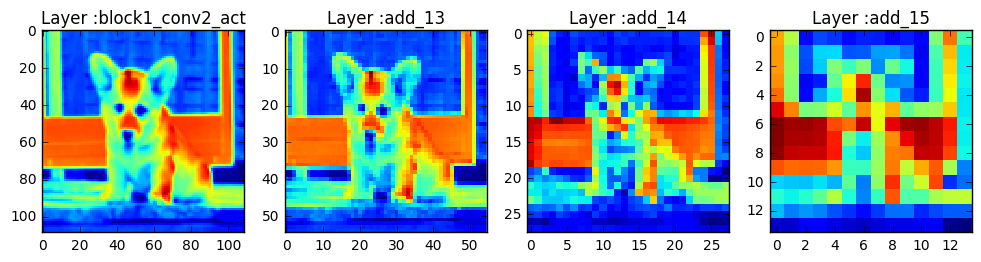

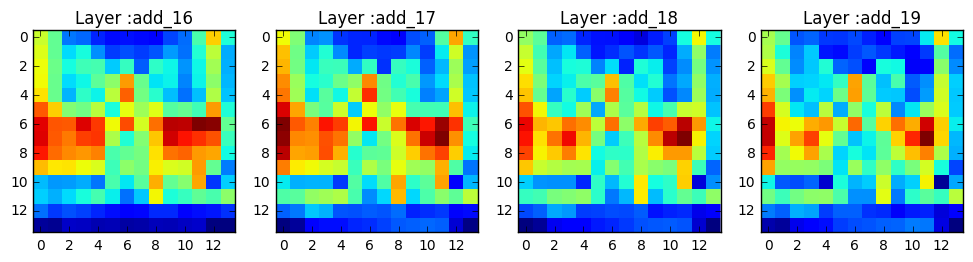

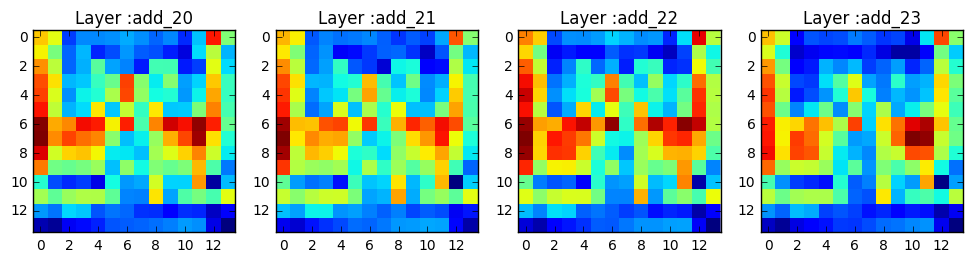

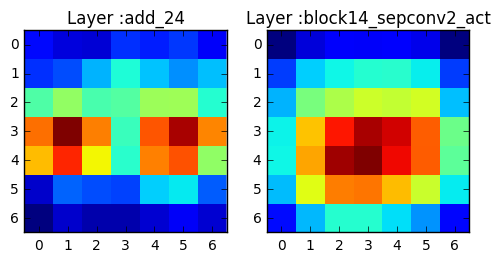

In [29]:
n = 4
for i, name in enumerate(layer_names):
    img = layer_outputs[name]
    img = np.max(img[0, :, :, :], axis=2)
    if i % n == 0:
        plt.figure(figsize=(12,4))
    plt.subplot(1, n, i % n + 1)
    plt.imshow(img, interpolation='none')
    plt.title('Layer :' + name)

In [101]:
xcnn.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_13 (InputLayer)            (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_10 (ZeroPadding2D (None, 250, 250, 3)   0           input_13[0][0]                   
____________________________________________________________________________________________________
conv2d_847 (Conv2D)              (None, 124, 124, 32)  864         zero_padding2d_10[0][0]          
____________________________________________________________________________________________________
batch_normalization_847 (BatchNo (None, 124, 124, 32)  96          conv2d_847[0][0]                 
___________________________________________________________________________________________

## Mixed cnn on cervix images

In [66]:
from custom_mix_cnn_keras_v2 import get_mixed_cnn, get_mixed_cnn3
from training_utils import find_best_weights_file2
from glob import glob

In [ ]:
cnn = get_mixed_cnn3()

In [ ]:
cnn.summary()

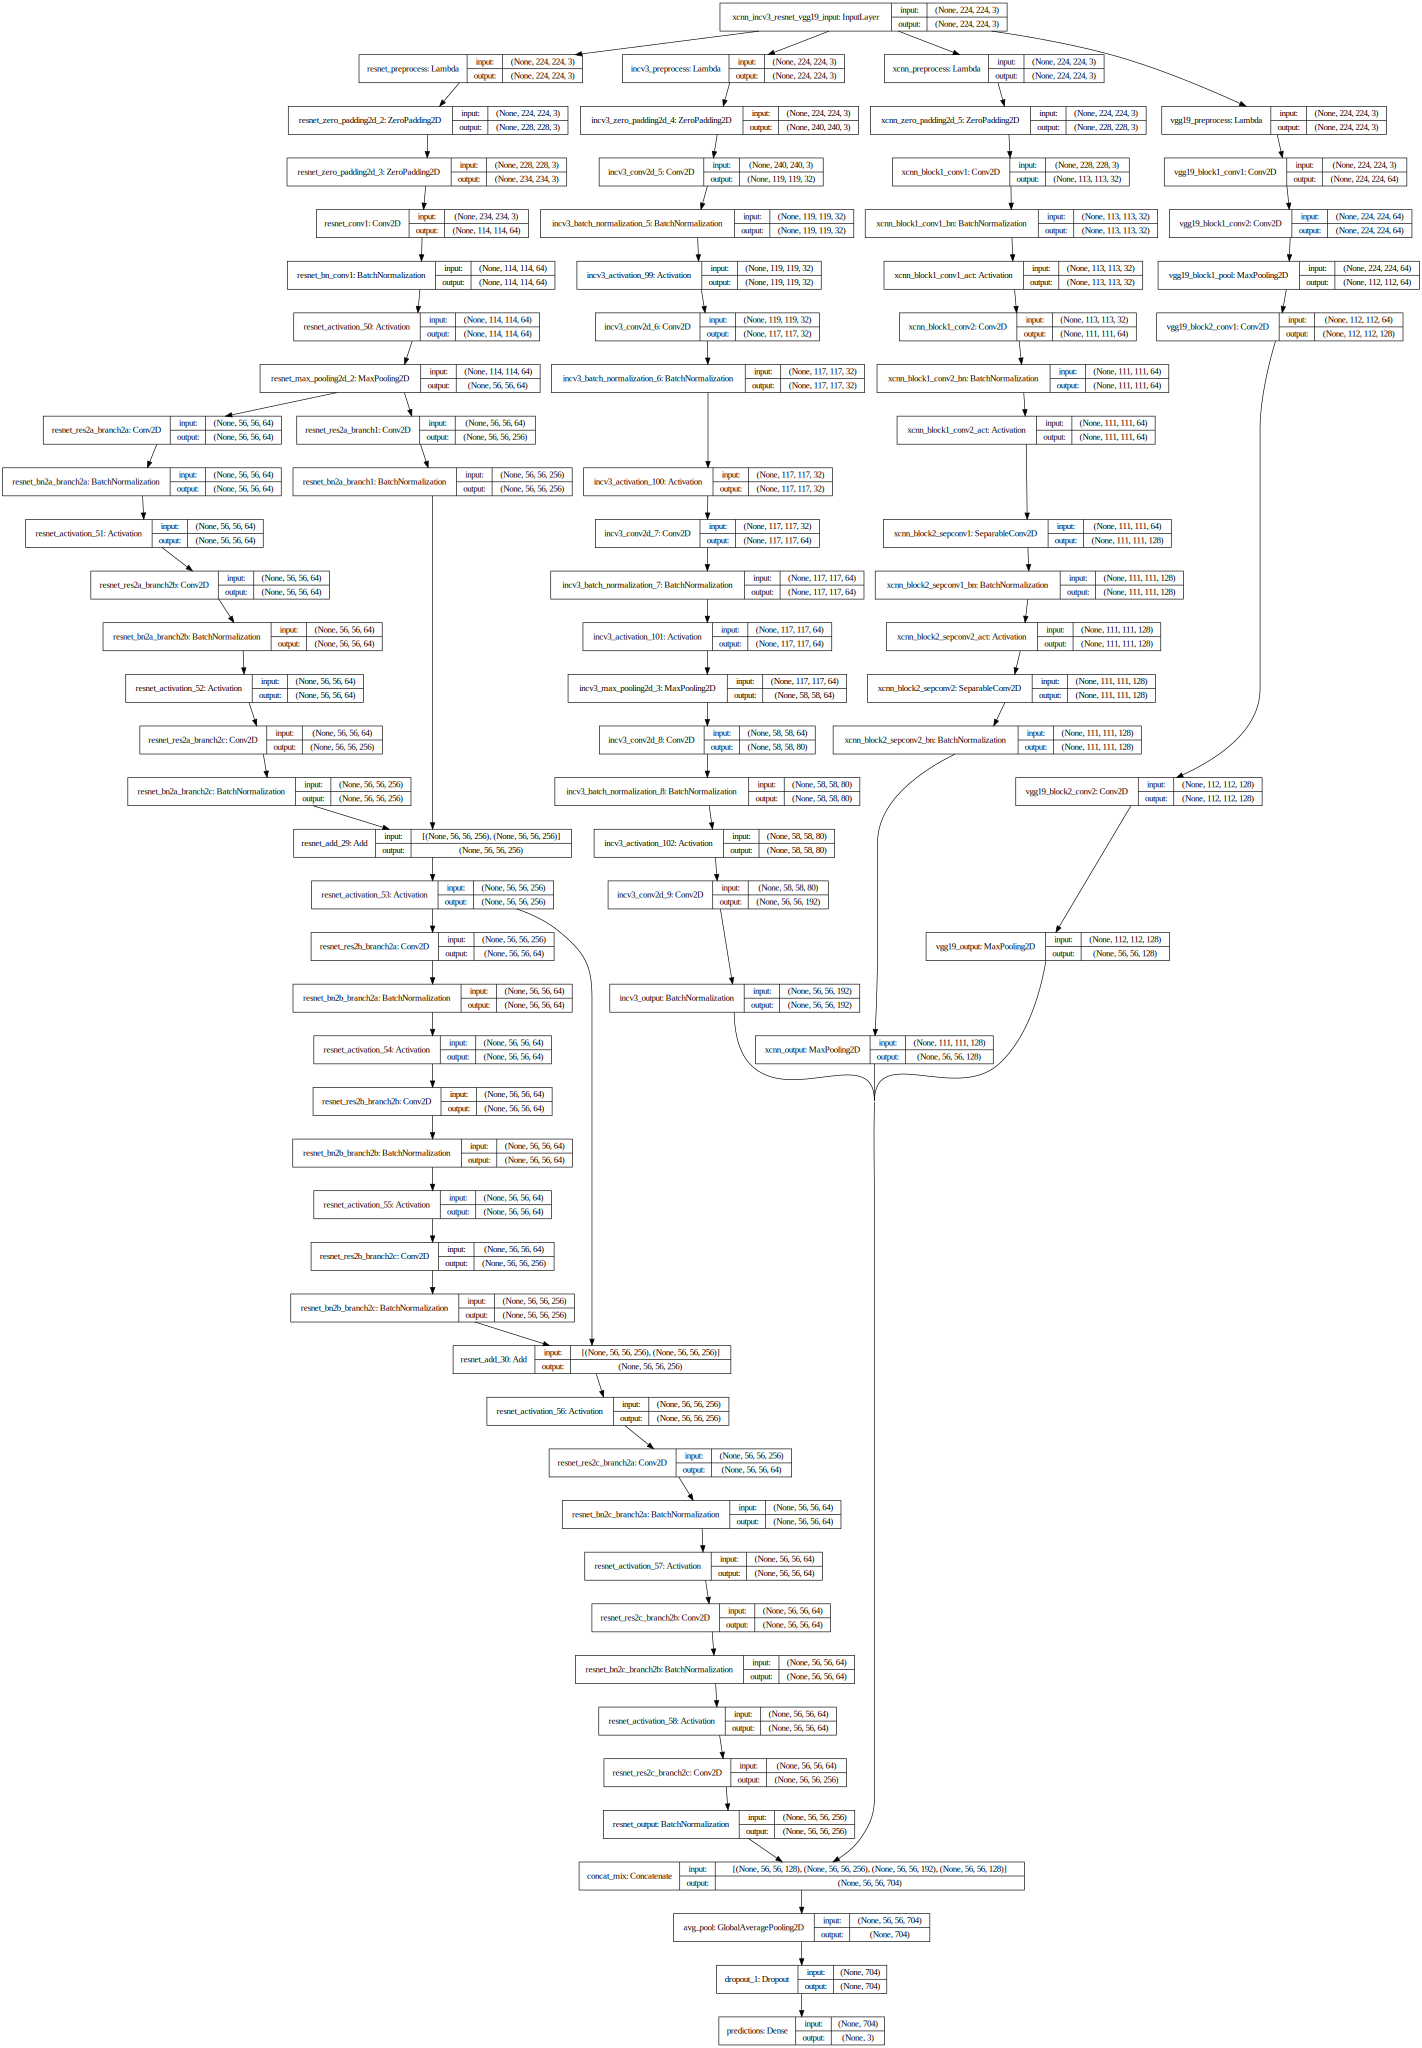

In [42]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

SVG(model_to_dot(cnn, show_shapes=True).create(prog='dot', format='svg'))

In [11]:
from glob import glob
from training_utils import find_best_weights_file2


save_prefix = 'mixed_cnn2_cervix_class_cvfold=%i_opt=%s_seed=%i' % (2, 'adadelta', 54321)


weights_files = glob("../notebooks/weights/%s*.h5" % save_prefix)
if len(weights_files) > 0:
    best_weights_filename, best_val_loss = find_best_weights_file2(weights_files, field_name='val_loss')
    print("Load best loss weights: ", best_weights_filename, best_val_loss)
    cnn.load_weights(best_weights_filename, by_name=True)


Load best loss weights:  ../notebooks/weights/mixed_cnn2_cervix_class_cvfold=2_opt=adadelta_seed=54321_10_val_loss=0.8981_val_cat_crossentropy=0.8981_val_cat_accuracy=0.5824.h5 0.8981


In [43]:
from data_utils import RESOURCES_PATH, GENERATED_DATA, get_annotations
from data_utils import get_id_type_list_from_annotations
from image_utils import get_image_data

sloth_annotations_filename = os.path.join(RESOURCES_PATH, 'cervix_os.json')
annotations = get_annotations(sloth_annotations_filename)
print("Number of hand-made annotations: ", len(annotations))

trainval_id_type_list = get_id_type_list_from_annotations(annotations, select=['os', 'cervix', 'ok'])
bad_id_type_list = get_id_type_list_from_annotations(annotations, select=['to_remove', ])
print(len(trainval_id_type_list), len(bad_id_type_list))

## Remove green imagery
from data_utils import remove_green_imagery
trainval_id_type_list = remove_green_imagery(trainval_id_type_list)
print(len(trainval_id_type_list))

Number of hand-made annotations:  4483
2839 1644
2821


In [79]:
layer_output_f_dict = {}
print([l.name for l in cnn.layers])

['xcnn_incv3_resnet_vgg19_input', 'xcnn_incv3_resnet_vgg19_input_inversion', 'resnet_preprocess', 'resnet_zero_padding2d_14', 'resnet_zero_padding2d_15', 'resnet_conv1', 'resnet_bn_conv1', 'resnet_activation_479', 'resnet_max_pooling2d_17', 'resnet_res2a_branch2a', 'resnet_bn2a_branch2a', 'resnet_activation_480', 'resnet_res2a_branch2b', 'resnet_bn2a_branch2b', 'resnet_activation_481', 'resnet_res2a_branch2c', 'resnet_res2a_branch1', 'resnet_bn2a_branch2c', 'resnet_bn2a_branch1', 'resnet_add_113', 'resnet_activation_482', 'resnet_res2b_branch2a', 'resnet_bn2b_branch2a', 'incv3_preprocess', 'resnet_activation_483', 'incv3_zero_padding2d_16', 'resnet_res2b_branch2b', 'incv3_conv2d_299', 'resnet_bn2b_branch2b', 'incv3_batch_normalization_299', 'resnet_activation_484', 'incv3_activation_528', 'resnet_res2b_branch2c', 'incv3_conv2d_300', 'resnet_bn2b_branch2c', 'incv3_batch_normalization_300', 'resnet_add_114', 'incv3_activation_529', 'xcnn_preprocess', 'vgg19_preprocess', 'resnet_activatio

In [80]:
layer_names=['incv3_output', 'incv3_output_crop', 
             'vgg19_output', 'vgg19_output_bn', 
             'xcnn_output', 'xcnn_output_crop', 
             'resnet_output', 'resnet_output_crop', 
             'concat_mix']

In [46]:
# print([l.name for l in cnn.layers if 'vgg19_' in l.name])

In [47]:
# layer_outputs = compute_layer_outputs(x, cnn, layer_output_f_dict, layer_names=[l.name for l in cnn.layers if 'vgg19_' in l.name], verbose=True)    

In [48]:
# for l in cnn.layers:
#     if 'vgg19_' in l.name:
#         o = layer_outputs[l.name]
#         print(l.name)
#         print(o.min(), o.max(), o.mean(), o.std())


In [81]:
from training_utils import get_train_gen_flow, get_val_gen_flow
from image_utils import scale_percentile

train_gen, train_flow = get_train_gen_flow(train_id_type_list=trainval_id_type_list,
                                             normalize_data=False,
                                             normalization='',
                                             batch_size=1,
                                             seed=54321,
                                             image_size=(224, 224),
                                             option='cervix',
                                             save_prefix='',
                                             xy_provider_cache=None,
                                             verbose=1)

In [61]:
# from image_utils import normalize

# def foo(x):
#     xx1 = np.power(1.0 - x, 2.0) 
# #     xx2 = 1.0 /( x + 1e-10 )
# #     xx2 = normalize(xx2, q_min=2.0, q_max=98.0)
#     xx = xx1 #+ xx2
#     return xx

In [62]:
# max_counter = 1
# for x, y in train_flow:
#     print("Image y = ", y)
#     plt.figure(figsize=(12, 4))
#     plt.subplot(121)
#     plt.imshow(scale_percentile(x[0, :, :, :]))
#     plt.colorbar()    
#     plt.subplot(122)    
#     plt.imshow(scale_percentile(foo(x[0,:,:,:])))
#     plt.colorbar()
#     break

In [63]:
# print("Image y = ", y)
# plt.figure(figsize=(12, 4))
# plt.subplot(121)
# plt.imshow(scale_percentile(x[0, :, :, :]))
# plt.colorbar()    
# plt.subplot(122)    
# plt.imshow(scale_percentile(foo(x[0,:,:,:])))
# plt.colorbar()


In [64]:
# layer_names.extend([
#     'block6_sepconv1_act', 
#     'block7_sepconv1_act', 
#     'block8_sepconv1_act', 
#     'block9_sepconv1_act',              
#     'block10_sepconv1_act',
#     'block11_sepconv1_act',
#     'block12_sepconv1_act',
#     'block13_sepconv1_act',
#     'block14_sepconv2_act',
# ])

-- incv3_output
-- incv3_output_crop
-- vgg19_output
-- vgg19_output_bn
-- xcnn_output
-- xcnn_output_crop
-- resnet_output
-- resnet_output_crop
-- concat_mix
Image y =  [[0 0 1]]


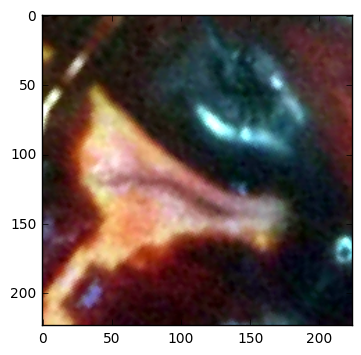

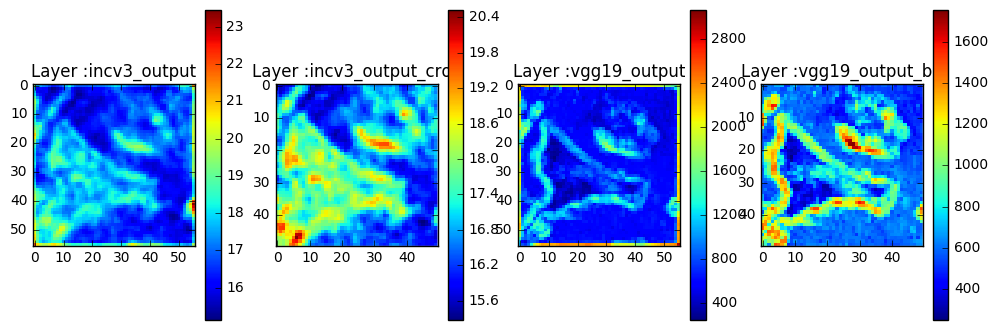

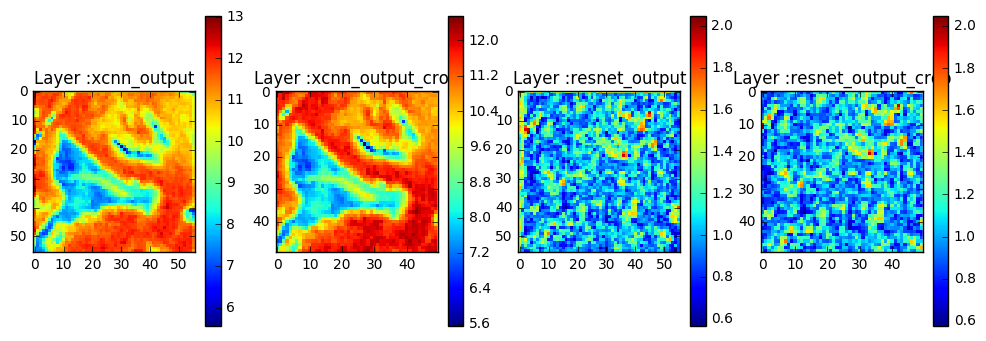

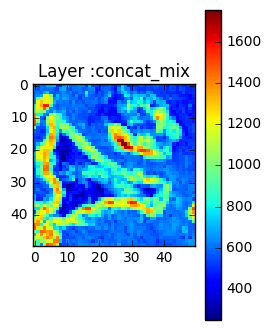

In [82]:
max_counter = 1
for x, y in train_flow:
            
    layer_outputs = compute_layer_outputs(x, cnn, layer_output_f_dict, layer_names=layer_names, verbose=True)    
    n = 4
    print("Image y = ", y)
    plt.figure(figsize=(12, 4))
    plt.imshow(scale_percentile(x[0, :, :, :]))
#     plt.imshow(x[0, :, :, :])    
    for i, name in enumerate(layer_names):
        img = layer_outputs[name]
        img = np.max(img[0, :, :, :], axis=2)
        if i % n == 0:
            plt.figure(figsize=(12,4))            
        plt.subplot(1, n, i % n + 1)
        plt.imshow(img, interpolation='none')
        plt.colorbar()
        plt.title('Layer :' + name)
        
    max_counter -= 1
    if max_counter <= 0:
        break